In many situations, we want to quickly explore data when constructing 
data features for different tasks (feature construction of algorithm development, visualizations)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bat_raw = pd.read_csv('/users/bgk/baseball/Batting.csv')
batting = bat_raw.groupby(['playerID', 'yearID']).sum().reset_index()
batting = batting[batting['yearID'] >= 1990]
#print(batting.head())

teams = pd.read_csv('/users/bgk/baseball/Teams.csv')
teams = teams[teams["yearID"] >= 1990]
#print(teams.head())

al_attendance = pd.DataFrame(teams[teams['lgID'] == 'AL'].groupby(['yearID', 'lgID'])['attendance'].agg('sum')).reset_index()
nl_attendance = pd.DataFrame(teams[teams['lgID'] == 'NL'].groupby(['yearID', 'lgID'])['attendance'].agg('sum')).reset_index()

al_wins = pd.DataFrame(teams[teams['lgID'] == 'AL'].groupby(['yearID', 'lgID'])['W'].agg('sum')).reset_index()
nl_wins = pd.DataFrame(teams[teams['lgID'] == 'NL'].groupby(['yearID', 'lgID'])['W'].agg('sum')).reset_index()
nl_wins.head()

,yearID,lgID,W
0,1990,NL,972
1,1991,NL,970
2,1992,NL,972
3,1993,NL,1134
4,1994,NL,802


We'll look at building functions around some simple visualizations.

1. Scatterplots
2. Line Plots
3. Histograms
4. Box Plots



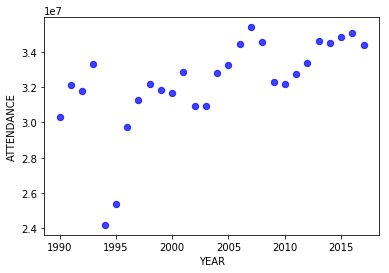

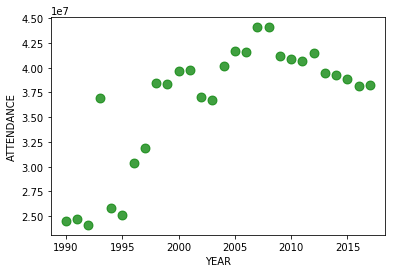

In [68]:
def scatterplot(x_data, 
                y_data, 
                size = 10, 
                x_label="", 
                y_label="", 
                title="", 
                color = "r", 
                yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = size, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
scatterplot(x_data = al_attendance['yearID'], 
            y_data = al_attendance['attendance'], 
            size = 40,
            x_label = "YEAR",
            y_label = "ATTENDANCE",
            color = "b",
            yscale_log = False
           )

scatterplot(x_data = nl_attendance['yearID'], 
            y_data = nl_attendance['attendance'], 
            size = 80,
            x_label = "YEAR",
            y_label = "ATTENDANCE",
            color = "g",
            yscale_log = False
           )

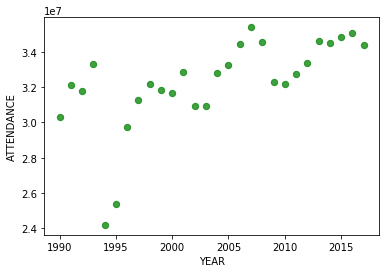

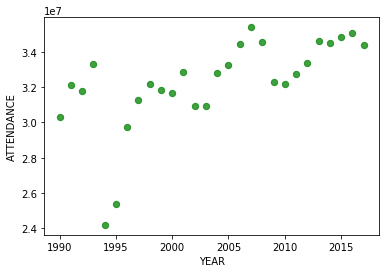

In [41]:
l = [al_attendance['attendance'],al_attendance['attendance']]

for k in l:
    scatterplot(x_data = al_attendance['yearID'], 
            y_data = k, 
            size = 40,
            x_label = "YEAR",
            y_label = "ATTENDANCE",
            color = "g",
            yscale_log = False
           )

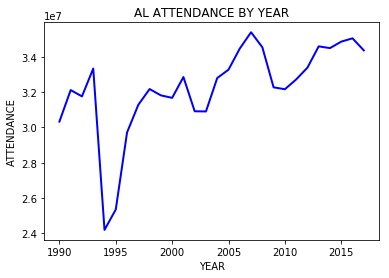

In [12]:
def lineplot(x_data, 
             y_data, 
             x_label="", 
             y_label="", 
             title="",
            lcolor = "",
            yscale_log=False):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = lcolor, alpha = 1)
    
    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
lineplot(x_data = al_attendance['yearID'], 
    y_data = al_attendance['attendance'],
    x_label = "YEAR",
    y_label = "ATTENDANCE",
    title = "AL ATTENDANCE BY YEAR",
    lcolor = "b",
    yscale_log=False)

In [30]:
al_attendance.head()
al_attendance.dtypes

yearID          int64
lgID           object
attendance    float64
dtype: object

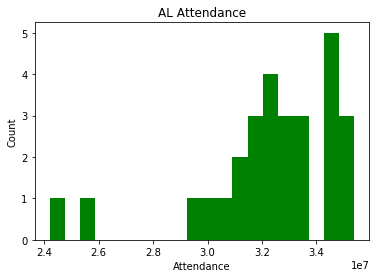

In [38]:
def histogram(data, 
              num_bins, 
              hcumulative=False, 
              hfacecolor= "",
              x_label = "", 
              y_label = "", 
              title = ""):
    _, ax = plt.subplots()
    
    ax.hist(data, bins = num_bins, facecolor = hfacecolor, cumulative = hcumulative)
    
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    
histogram(al_attendance['attendance'], 
          num_bins = 20, 
          hcumulative = False, 
          hfacecolor = 'green',
          x_label = "Attendance", 
          y_label = "Count", 
          title = "AL Attendance")

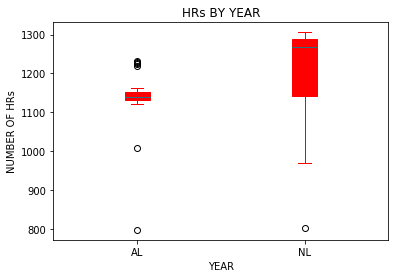

In [79]:
def boxplot(x_data,
            y_data,
            size = 10,
            base_color="", 
            median_color="", 
            x_label="", 
            y_label="", 
            title="", 
            notched = False,
            horizontal = False):
    _, ax = plt.subplots()

    # Draw boxplots, specifying desired style
    ax.boxplot(y_data
               # patch_artist must be True to control box fill
               , patch_artist = True
               # Properties of median line
               , medianprops = {'color': median_color}
               # Properties of box
               , boxprops = {'color': base_color, 'facecolor': base_color}
               # Properties of whiskers
               , whiskerprops = {'color': base_color}
               # Properties of whisker caps
               , capprops = {'color': base_color},
              notch = notched,
              vert = not (horizontal) )

    # By default, the tick label starts at 1 and increments by 1 for
    # each box drawn. This sets the labels to the ones we want
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    

boxplot(x_data = ["AL", "NL"],
       y_data = [al_wins['W'], nl_wins['W']],
       size = 60,
       base_color= 'r', 
       median_color="#297083",
       x_label = "YEAR",
       y_label = "NUMBER OF HRs",
       title = "HRs BY YEAR",
       notched = False,
       horizontal = False)

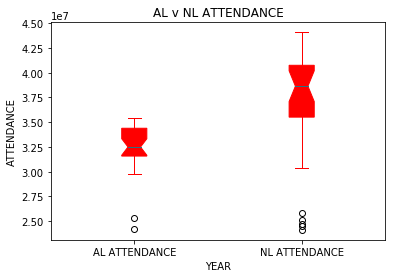

In [83]:
al_attendance_list = al_attendance['attendance']
nl_attendance_list = nl_attendance['attendance']
data_to_plot = [al_attendance_list, nl_attendance_list]

boxplot(x_data = ['AL ATTENDANCE', 'NL ATTENDANCE'],
       y_data = data_to_plot,
       size = 60,
       base_color= 'r', 
       median_color="#297083",
       x_label = "YEAR",
       y_label = "ATTENDANCE",
       title = "AL v NL ATTENDANCE",
       notched = True,
       horizontal = False)

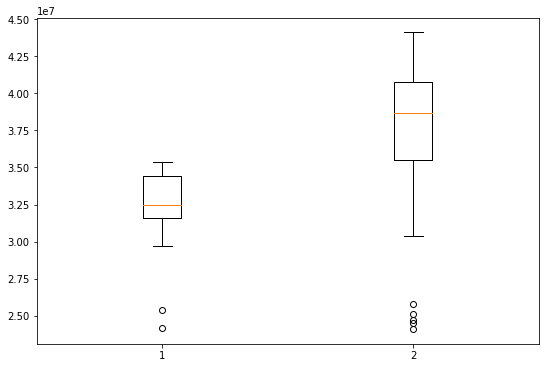

In [85]:
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)


# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)


# Save the figure
#fig.savefig('fig1.png', bbox_inches='tight')

In [ ]:
If you save your functions in a file, say viz_functions.py, in order to use them you
import the file without the .py extension

import viz_functions
from viz_functions import boxplot

Or, in Python 3+, you can use exec: 
    
exec('/users/bgk/code/viz_functions.py')
